IMPORTING NECESSARY PACKAGES AND MODULES

In [2]:
import pandas as pd
from data_preprocess import *
from train_test import *
from evaluation import *
from data_exploration import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from knn_classifier import *

READING THE CSV FILE

In [3]:
df = pd.read_csv("../../../datasets/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


PREPROCESSING RECOMMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [4]:
process_binary(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


features-LIST WITH DEPENDENT VARIABLES target1-target variable

In [5]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']

SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

In [6]:
x = df[features]
y1 = df[target1].values.ravel()

# accuracy variation with different train test split ratio with KNN model

this function does following things:

1-holdout validation of dataset by splitting in training and testing set

2-applying KNN model with parameters as no. of neighbours is 5 and weighing criteria is uniform.

3- main aim is doing multiple train- test split and evaluate accucracy thus we can be sure that our model is stable or not over fitted on training data. 

4-this highlights the importance of choosing suitable train-test ratio for good accuracy score of our model. 

result obtained:
the accuracy is highest with train-test split ratio of 60:40 of 78.3673%.

In [7]:
 classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [8]:
df1 = split_table(classifier,x,y1)
df1

,train_set(%),test_set(%),accuracy,f1_score,precision_score,recall_score
0,95.0,5.0,74.285714,0.363636,0.450000,0.305085
1,94.0,6.0,75.850340,0.382609,0.468085,0.323529
2,93.0,7.0,76.384840,0.381679,0.480769,0.316456
3,92.0,8.0,76.275510,0.375839,0.474576,0.311111
4,91.0,9.0,75.736961,0.381503,0.485294,0.314286
5,90.0,10.0,76.530612,0.391534,0.468354,0.336364
6,89.0,11.0,77.551020,0.403941,0.493976,0.341667
7,88.0,12.0,78.061224,0.426667,0.521739,0.360902
8,87.0,13.0,78.178964,0.446215,0.533333,0.383562
9,86.0,14.0,77.551020,0.429630,0.527273,0.362500


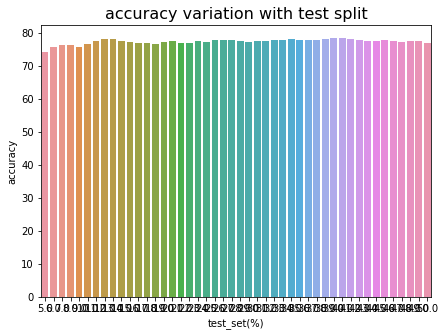

In [9]:
graph(df1,"test_set(%)","accuracy","accuracy variation with test split")

# applying KNN model with hyper parameter tuning .

applying KNN model with hyper parameter tuning for the value of k and weighting criteria to choose suitable parametric values to inhance overall perforamance of model taking train-test ratio 60:40 obtained from above analysis.

In [10]:
X_train, X_test, y_train, y_test = data_split(x,y1,0.40)

using grid search CV for getting suitable values of k(no. of neighbours around a data point) and weight criteria(method for choosing most closely related neighbour) with 10 fold validation.

In [11]:
grid_knn(X_train, y_train)


{'n_neighbors': 30, 'weights': 'distance'}

using obtained value of k and weight criteria and evaluating the results.obtained accuracy is 84.2857 quite great than one with decision tree of 80.075%.

1- 1652 out of 1960 samples are correctly classified. 
2- 1494 samples are recommended. 
3- 158 sample are not recommended. 
4- 32 samples that were not recommended(false) are classfied as true. 
5- 276 samples that were recommended(true) are classified as false.

In [12]:
y_pred,y_prob = knn_class(X_test,X_train,y_train,30,"distance")
print( "Accuracy of with KNN classifier is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of with KNN classifier is:  84.28571428571429

classification report:               precision    recall  f1-score   support

       False       0.84      0.98      0.91      1526
        True       0.83      0.36      0.51       434

    accuracy                           0.84      1960
   macro avg       0.84      0.67      0.71      1960
weighted avg       0.84      0.84      0.82      1960


confusion matrix: [[1494   32]
 [ 276  158]]


# accuracy variation with different train test split ratio with decision tree model

this function does following things:

1-holdout validation of dataset by splitting in training and testing set

2-applying decision tree model with hyper  parameter tuning obtained from task#2wine_quality notebook.

max depth is 6 

min_samples_leaf are 2

used impurity criteria is gini.

3- main aim is doing multiple train- test split and evaluate accucracy thus we can be sure that our model is stable or not over fitted on training data. 

4-this highlights the importance of choosing suitable train-test ratio for good accuracy score of our model. 

result obtained:
the accuracy is highest with train-test split ratio of 51:49 of 80.75%.

In [13]:
classifier = DecisionTreeClassifier(
        criterion="gini",
        splitter="random",
        random_state=42,
        max_depth=6,
        min_samples_leaf=2,
    )

In [15]:
df2 = split_table(classifier,x,y1)
df2

,train_set(%),test_set(%),accuracy,f1_score,precision_score,recall_score
0,95.0,5.0,79.183673,0.301370,0.785714,0.186441
1,94.0,6.0,76.870748,0.451613,0.500000,0.411765
2,93.0,7.0,78.425656,0.339286,0.575758,0.240506
3,92.0,8.0,79.081633,0.327869,0.625000,0.222222
4,91.0,9.0,78.684807,0.328571,0.657143,0.219048
5,90.0,10.0,80.000000,0.371795,0.630435,0.263636
6,89.0,11.0,80.519481,0.385965,0.647059,0.275000
7,88.0,12.0,78.571429,0.422018,0.541176,0.345865
8,87.0,13.0,79.120879,0.448133,0.568421,0.369863
9,86.0,14.0,79.008746,0.470588,0.571429,0.400000


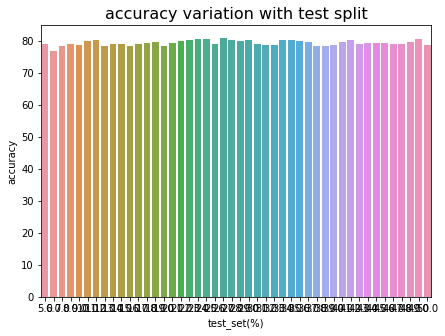

In [16]:
graph(df2,"test_set(%)","accuracy","accuracy variation with test split")